# Stroke Prediction Using Logistic Regression

Kelompok 4 Proyek Pembelajaran Mesin
- Edwin Immanuel Damanik   - 11419011
- Hepniwer N A Purba       - 11419019
- Santo Lamsar Harianja    - 11419027
- Meyliza Veronica Siregar - 11419058
- Geby W P Lumban Gaol     - 11419068

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
#PREPROCESSING DATA
#1. Missing Data
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
#Drop missing values
modifiedDataset = data.dropna()

In [6]:
modifiedDataset.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
modifiedDataset.to_csv('healthcare-dataset-stroke-data.csv',index=False)

In [8]:
data=data.dropna()

In [9]:
data.dropna(axis = 1)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [10]:
#Dropping ID Column
data=data.drop(['id'],axis=1)

In [11]:
data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
10,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
11,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [12]:
#2. Data Formatting
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [13]:
#3. Normalisasi Data
from sklearn import preprocessing
import pandas as pd
col_list = ["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi", "stroke"]
stroke = pd.read_csv("healthcare-dataset-stroke-data.csv", usecols=col_list)
scaler = preprocessing.MinMaxScaler()
names = stroke.columns
d = scaler.fit_transform(stroke)
scaled_df = pd.DataFrame(d, columns = names)
scaled_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0.816895,0.0,1.0,0.801265,0.301260,1.0
1,0.975586,0.0,1.0,0.234512,0.254296,1.0
2,0.597168,0.0,0.0,0.536008,0.276060,1.0
3,0.963379,1.0,0.0,0.549349,0.156930,1.0
4,0.987793,0.0,0.0,0.605161,0.214204,1.0


Unique Value
 [1 0]
Value Counts
 0    4700
1     209
Name: stroke, dtype: int64


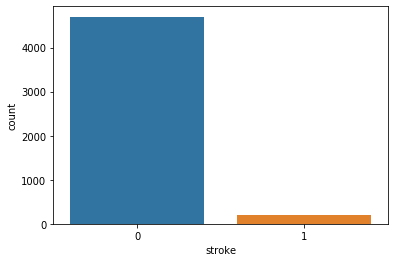

In [14]:
#Jumlah Penderita Stroke
print('Unique Value\n',data['stroke'].unique())
print('Value Counts\n',data['stroke'].value_counts())

sns.countplot(data=data,x='stroke')

Unique values
 ['Male' 'Female' 'Other']
Value Counts
 Female    2897
Male      2011
Other        1
Name: gender, dtype: int64


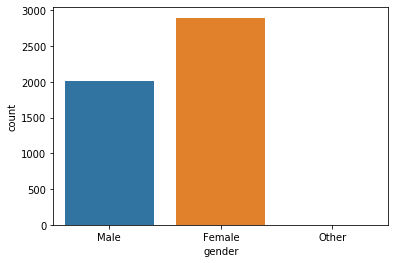

In [15]:
#Value pada gender dan jumlahnya
print('Unique values\n',data['gender'].unique())
print('Value Counts\n',data['gender'].value_counts())

sns.countplot(data=data,x='gender')

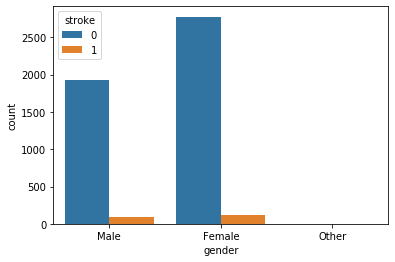

In [16]:
#Jumlah Penderita Stroke berdasarkan gender
sns.countplot(data=data,x='gender',hue='stroke')

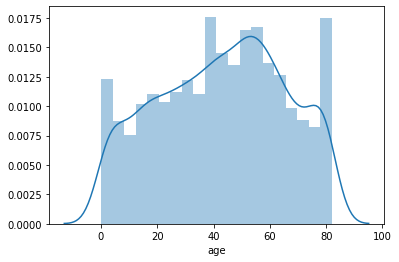

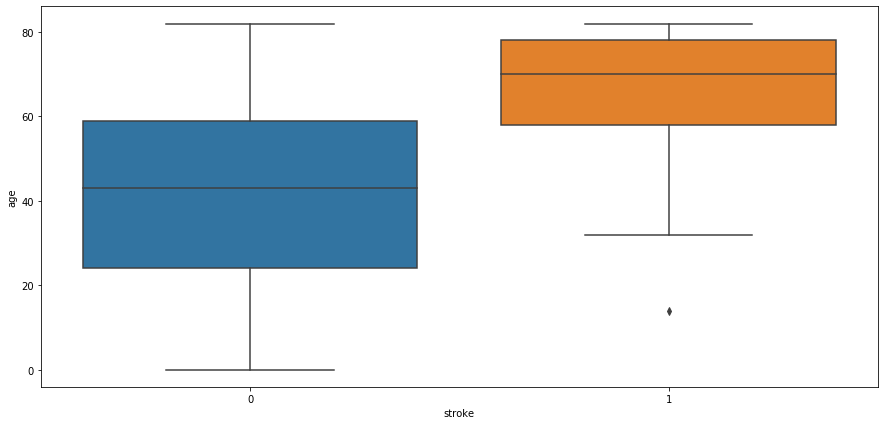

In [17]:
#Distribusi age
data['age'].nunique()

sns.distplot(data['age'])

plt.figure(figsize=(15,7))
sns.boxplot(data=data,x='stroke',y='age')

Unique Value
 [0 1]
Value Counts
 0    4458
1     451
Name: hypertension, dtype: int64


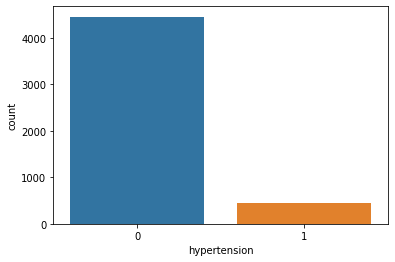

In [18]:
#Value pada hypertension dan jumlahnya
print('Unique Value\n',data['hypertension'].unique())
print('Value Counts\n',data['hypertension'].value_counts())

sns.countplot(data=data,x='hypertension')

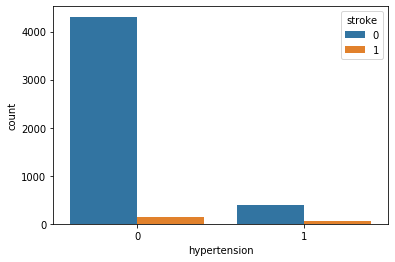

In [19]:
#Jumlah Penderita Stroke berdasarkan hypertension
sns.countplot(data=data,x='hypertension',hue='stroke')

Unique Value
 [1 0]
Value Counts
 0    4666
1     243
Name: heart_disease, dtype: int64


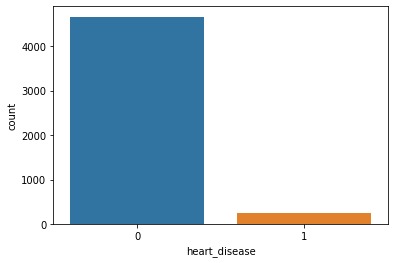

In [20]:
#Value pada heart_disease dan jumlahnya
print('Unique Value\n',data['heart_disease'].unique())
print('Value Counts\n',data['heart_disease'].value_counts())

sns.countplot(data=data,x='heart_disease')

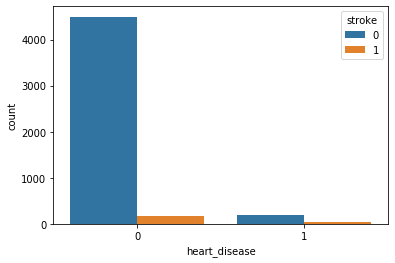

In [21]:
#Jumlah Penderita Stroke berdasarkan heart_disease
sns.countplot(data=data,x='heart_disease', hue='stroke')

Unique Values
 ['Yes' 'No']
Value Counts
 Yes    3204
No     1705
Name: ever_married, dtype: int64


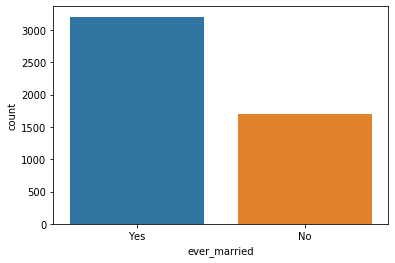

In [22]:
#Value pada Ever_married dan jumlahnya
print('Unique Values\n',data['ever_married'].unique())
print('Value Counts\n',data['ever_married'].value_counts())

sns.countplot(data=data,x='ever_married')

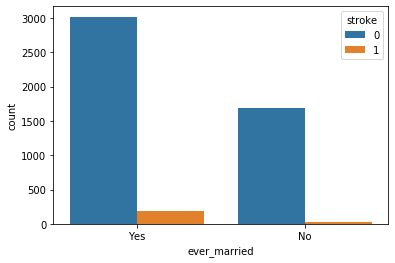

In [23]:
#Jumlah Penderita Stroke berdasarkan ever_married
sns.countplot(data=data,x='ever_married',hue='stroke')

Unique Value
 ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Value Counts
 Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64


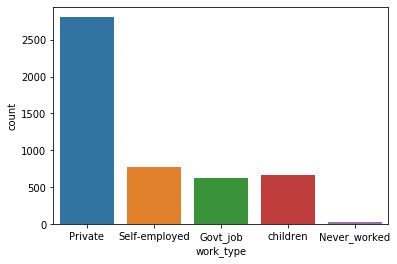

In [24]:
#Value pada work_type dan jumlahnya
print('Unique Value\n',data['work_type'].unique())
print('Value Counts\n',data['work_type'].value_counts())

sns.countplot(data=data,x='work_type')

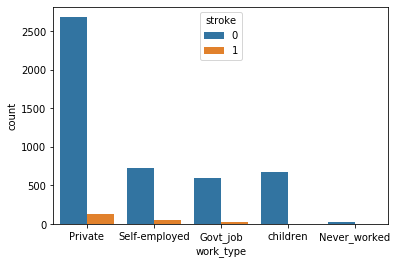

In [25]:
#Jumlah Penderita Stroke berdasarkan work_type
sns.countplot(data=data,x='work_type',hue='stroke')

Unique Values
 ['Urban' 'Rural']
Value Counts
 Urban    2490
Rural    2419
Name: Residence_type, dtype: int64


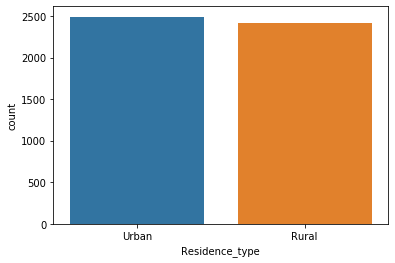

In [26]:
#Value pada Residence_type dan jumlahnya
print('Unique Values\n',data['Residence_type'].unique())
print("Value Counts\n",data['Residence_type'].value_counts())

sns.countplot(data=data,x='Residence_type')

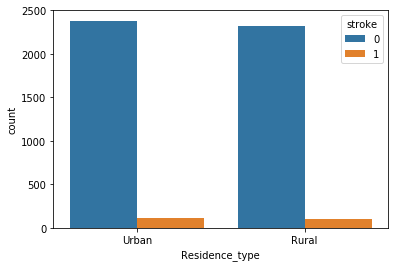

In [27]:
#Jumlah Penderita Stroke berdasarkan Residence Type
sns.countplot(data=data,x='Residence_type',hue='stroke')

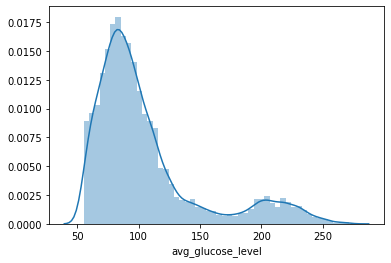

In [28]:
#Distribusi avg_glucose_level
data['avg_glucose_level'].nunique()

sns.distplot(data['avg_glucose_level'])

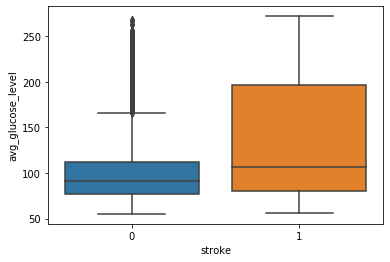

In [29]:
#Jumlah Penderita Stroke berdasarkan avg_glucose_level
sns.boxplot(data=data,x='stroke',y='avg_glucose_level')

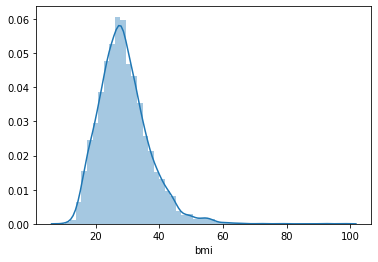

In [30]:
#Distribusi BMI 
data['bmi'].nunique()

sns.distplot(data['bmi'])

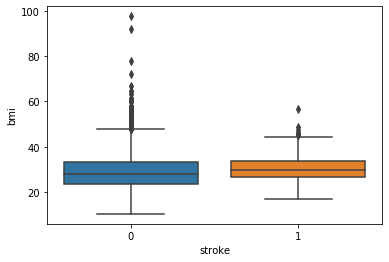

In [31]:
#Jumlah Penderita Stroke berdasarkan bmi
sns.boxplot(data=data,x='stroke',y='bmi')

Unique Values
 ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Value Counts
 never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64


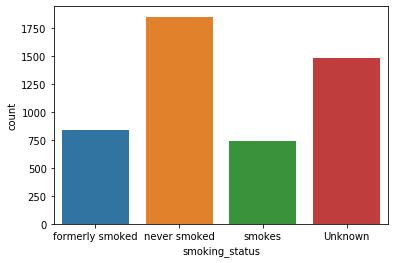

In [32]:
#Value pada Smoking status dan jumlahnya
print('Unique Values\n',data['smoking_status'].unique())
print('Value Counts\n',data['smoking_status'].value_counts())

sns.countplot(data=data,x='smoking_status')

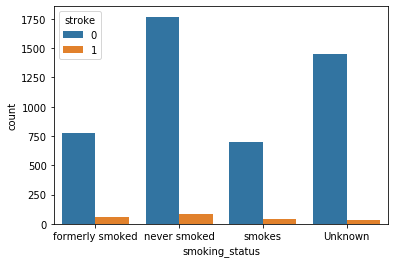

In [33]:
#Penderita Stroke berdasarkan smoking status
sns.countplot(data=data,x='smoking_status',hue='stroke')

In [36]:
#4. Label Encoding
from sklearn.preprocessing import LabelEncoder
cols=data.select_dtypes(include=['object']).columns
print(cols)
# This code will fetech columns whose data type is object.
le=LabelEncoder()
# Initializing our Label Encoder object
data[cols]=data[cols].apply(le.fit_transform)
# Transfering categorical data into numeric
print(data.head(10))

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')
    gender   age  hypertension  heart_disease  ever_married  work_type  \
0        1  67.0             0              1             1          2   
2        1  80.0             0              1             1          2   
3        0  49.0             0              0             1          2   
4        0  79.0             1              0             1          3   
5        1  81.0             0              0             1          2   
6        1  74.0             1              1             1          2   
7        0  69.0             0              0             0          2   
9        0  78.0             0              0             1          2   
10       0  81.0             1              0             1          2   
11       0  61.0             0              1             1          0   

    Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0  

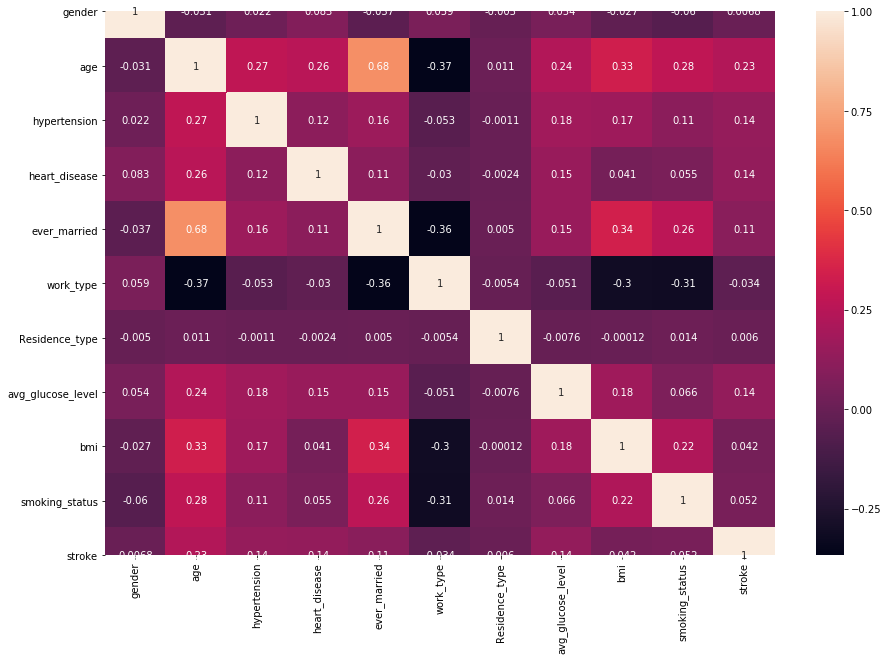

In [37]:
#Correlation
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(method='pearson'), annot=True)

In [38]:
from sklearn.feature_selection import SelectKBest, f_classif
classifier = SelectKBest(score_func=f_classif,k=5)
fits = classifier.fit(data.drop('stroke',axis=1),data['stroke'])
x=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(data.drop('stroke',axis=1).columns)
fscores = pd.concat([columns,x],axis=1)
fscores.columns = ['Attribute','Score']
fscores.sort_values(by='Score',ascending=False)

,Attribute,Score
1,age,279.980918
2,hypertension,101.729361
7,avg_glucose_level,96.585072
3,heart_disease,95.175560
4,ever_married,54.796734
9,smoking_status,13.078821
8,bmi,8.826500
5,work_type,5.597754
0,gender,0.224073
6,Residence_type,0.178514


In [39]:
cols=fscores[fscores['Score']>50]['Attribute']
print(cols)

1                  age
2         hypertension
3        heart_disease
4         ever_married
7    avg_glucose_level
Name: Attribute, dtype: object


In [40]:
#Outlier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
feature_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
X = data[feature_columns].values
y = data['stroke'].values

In [42]:
X

array([[ 67.  ,   0.  ,   1.  , 228.69,  36.6 ],
       [ 80.  ,   0.  ,   1.  , 105.92,  32.5 ],
       [ 49.  ,   0.  ,   0.  , 171.23,  34.4 ],
       ...,
       [ 35.  ,   0.  ,   0.  ,  82.99,  30.6 ],
       [ 51.  ,   0.  ,   0.  , 166.29,  25.6 ],
       [ 44.  ,   0.  ,   0.  ,  85.28,  26.2 ]])

In [43]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

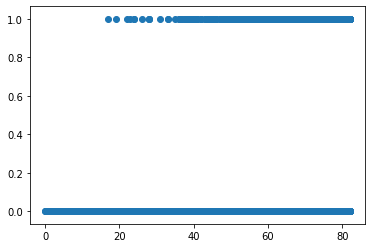

In [44]:
from numpy import where
from matplotlib import pyplot
pyplot.scatter(X[:,0],X[:,1])
pyplot.show()

In [45]:
X[y,0]

array([80., 80., 80., ..., 67., 67., 67.])

In [46]:
X[y,1]

array([0., 0., 0., ..., 0., 0., 0.])

In [47]:
df = pd.DataFrame(X,y)
df

,0,1,2,3,4
1,67.0,0.0,1.0,228.69,36.6
1,80.0,0.0,1.0,105.92,32.5
1,49.0,0.0,0.0,171.23,34.4
1,79.0,1.0,0.0,174.12,24.0
1,81.0,0.0,0.0,186.21,29.0
...,...,...,...,...,...
0,13.0,0.0,0.0,103.08,18.6
0,81.0,0.0,0.0,125.20,40.0
0,35.0,0.0,0.0,82.99,30.6
0,51.0,0.0,0.0,166.29,25.6


['g' 'g' 'g' ... 'r' 'r' 'r']


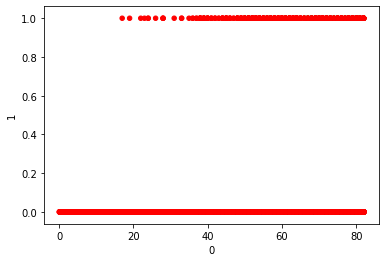

In [48]:
df['key1'] = (y)
colors = np.where(df["key1"]==0, 'r', 'g')
print(colors)
df.plot.scatter(x = 0, y = 1, c = colors)
plt.show()

In [49]:
#Splitting Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [50]:
X_train

array([[ 56.  ,   0.  ,   0.  , 125.87,  24.6 ],
       [ 24.  ,   0.  ,   0.  , 103.45,  25.1 ],
       [ 81.  ,   1.  ,   1.  ,  59.11,  20.7 ],
       ...,
       [ 24.  ,   1.  ,   0.  ,  80.63,  28.2 ],
       [  9.  ,   0.  ,   0.  , 142.68,  24.4 ],
       [ 58.  ,   0.  ,   0.  ,  69.24,  27.6 ]])

In [51]:
X_test

array([[ 49.  ,   0.  ,   0.  ,  70.73,  27.3 ],
       [ 40.  ,   0.  ,   0.  , 144.48,  29.8 ],
       [ 74.  ,   0.  ,   0.  , 251.99,  25.5 ],
       ...,
       [ 18.  ,   0.  ,   0.  , 120.58,  21.5 ],
       [ 19.  ,   0.  ,   0.  , 110.7 ,  38.5 ],
       [ 48.  ,   0.  ,   0.  ,  98.24,  34.6 ]])

In [52]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
y_pred = classifier.predict(X_test)

In [54]:
#import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[939,   0],
       [ 43,   0]], dtype=int64)

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

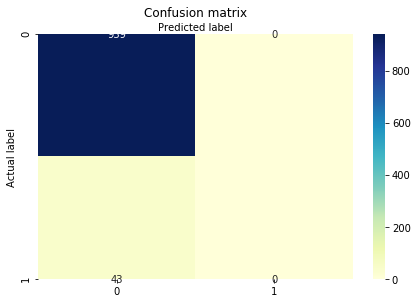

In [56]:
#Confussion Matrix
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred) * 100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %. ')

Accuracy of our model is equal 95.62 %. 


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.00      0.00      0.00        43

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.96      0.93       982



C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [62]:
from sklearn.metrics import roc_auc_score, auc, roc_curve, recall_score

#ROC
predicted_probab_log = classifier.predict_proba(X_test)
predicted_probab_log = predicted_probab_log[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab_log)

In [63]:
auc = roc_auc_score(y_test, predicted_probab_log)
print('AUC: %.2f' % auc)

AUC: 0.85


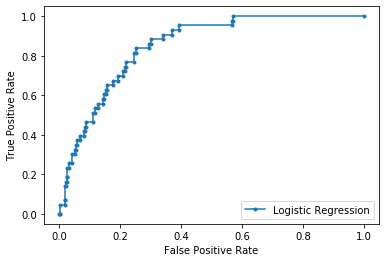

In [64]:
from matplotlib import pyplot
pyplot.plot(fpr, tpr, marker='.', label='Logistic Regression')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()